## Import Packages

In [14]:
import re
from gensim.models import Word2Vec, FastText, LsiModel, LdaModel
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from gensim import corpora
from collections import Counter

## Loading the Data

In [15]:
def load_data(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines() 
        cleaned_lines = [re.sub(r'<[^>]*>', '', line) for line in lines]
        words = [[word.strip() for word in line.split()] for line in cleaned_lines]
        return words

def load_data_words(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines() 
        cleaned_lines = [re.sub(r'<[^>]*>', '', line) for line in lines]
        words = [word.strip() for line in cleaned_lines for word in line.split()]
        return words

def clean_data(df):
    df['line'] = df['line'].fillna('').str.lower()
    df['line'] = df['line'].str.replace(r'[.,=%*!-]', ' ', regex=True).str.split()
    df['line'] = df['line'].apply(lambda x: [word.strip() for word in x])

def clean_data_sentence(df):
    df['combined_line'] = df['line'].fillna('').str.lower()
    df['combined_line'] = df['combined_line'].str.replace(r'[.,=%*!-]', ' ', regex=True)

In [16]:
file_path = 'voynich_currier.txt'
words = load_data(file_path)

In [17]:
words[:10]

[['VAS92', '9FAE', 'AR', 'APAM', 'ZOE', 'ZOR9', 'QRC2', '9', 'FOR', 'ZOE89'],
 ['2OR9', 'XAR', 'OR', '9', 'FAT', 'SPAM', 'ZAR', 'ARC', 'QAR', 'QAR', '8AD'],
 ['29AU', 'ZCF9', 'OR', '9FAM', 'ZO8', 'QOAR9', 'QC2', '8ARAM', '2A'],
 ['OOM', 'OPCC9', 'OPCO2', 'ROEOP9', 'Q*AR', '8AM', 'OPAM', 'OR', 'OFAD'],
 ['8AT', '9', 'SCAR', 'QAM', 'WAR', 'YAM'],
 ['98ARAIZ9'],
 ['*', 'O8AR', 'O', '9', 'ZOE', 'WO9', 'O98AR', 'Z', '2', 'YOAM', 'ZO8AR9'],
 ['9ZC9', 'ZO89', 'OFSO9', 'OPSOE', 'SOQ9', 'O2S9', '8AN', 'SOR', 'FO2'],
 ['8AM', 'ZO2', 'YOE', 'ZO89'],
 ['8AN', 'O2', 'PCO89']]

In [18]:
takahashi = pd.read_csv('interlinear_full_lines.txt', sep="\t", quotechar="\"", header=0)

In [19]:
takahashi.head()

line folio section quire  \
0  fachys.ykal.ar.ataiin.shol.shory.cth!res.y.kor...   f1r       T     A   
1  fachys.ykal.ar.ataiin.shol.shory.cthorys.y.kor...   f1r       T     A   
2  fya!ys.ykal.ar.ytaiin.shol.shory.*k*!res.y!kor...   f1r       T     A   
3  fachys.ykal.ar.ataiin.shol.shory.cth!res.y,kor...   f1r       T     A   
4  fya!ys.ykal.ar.ytaiin.shol.shory.***!r*s.y.kor...   f1r       T     A   

  panel language hand misc d.hand placement line_number transcriber  \
0     A        A    1  NaN      1        P1           1           H   
1     A        A    1  NaN      1        P1           1           C   
2     A        A    1  NaN      1        P1           1           F   
3     A        A    1  NaN      1        P1           1           N   
4     A        A    1  NaN      1        P1           1           U   

                                        complex.line  par_init  par_fin  
0  fachys.ykal.ar.ataiin.shol.shory.cth!res.y.kor...       0.0     27.0  
1  fachys.ykal.ar.ataiin.shol.shory.cthorys.y.kor...       NaN      NaN  
2  fya!ys.ykal.ar.ytaiin.shol.shory.*k*!res.y!kor...       NaN      NaN  
3  fachys.ykal.ar.ataiin.shol.shory.cth!res.y,kor...       NaN      NaN  
4  fya!ys.ykal.ar.ytaiin.shol.shory.***!r*s.y.kor...       NaN      NaN

In [20]:
takahashi['section'].value_counts()

section
H    5558
B    3595
S    3111
P    1513
C    1078
Z    1016
A     785
T     701
Name: count, dtype: int64

In [21]:
takahashi['hand'].value_counts()

hand
2    4707
1    4010
X     752
3     602
4     534
Y     190
5     138
Name: count, dtype: int64

#### Variable Explanations
- `section` = type of illustration
    - broadly speaking:
        - botanical/herbal
        - astrological/astronomical
        - balneological
        - pharmaceutical
        - starred paragraphs/“recipes”
    - variables
        - `T` = Text
        - `H` = Herbal
        - `A` = Astro
        - `C` = Cosmo
        - `Z` = Zodiac
        - `B` = Bio/Balneo
        - `P` = Pharma
        - `S` = Stars/Recipes
- `quire` = numbering style
- `language` = Currier Language (thought to have two different languages)
    - A
    - B
    - NA
- `hand` = hand type, if illustrated (paragraph text = P, P1, P2, etc.; labelled text = L1, L2, etc.) 
- `placement` = placement within page 

In [22]:
clean_data_sentence(takahashi)
takahashi['combined_line'][0:5]

0    fachys ykal ar ataiin shol shory cth res y kor...
1    fachys ykal ar ataiin shol shory cthorys y kor...
2    fya ys ykal ar ytaiin shol shory  k  res y kor...
3    fachys ykal ar ataiin shol shory cth res y kor...
4    fya ys ykal ar ytaiin shol shory     r s y kor...
Name: combined_line, dtype: object

In [23]:
clean_data(takahashi)

In [24]:
takahashi['line'][0:5]

0    [fachys, ykal, ar, ataiin, shol, shory, cth, r...
1    [fachys, ykal, ar, ataiin, shol, shory, cthory...
2    [fya, ys, ykal, ar, ytaiin, shol, shory, k, re...
3    [fachys, ykal, ar, ataiin, shol, shory, cth, r...
4    [fya, ys, ykal, ar, ytaiin, shol, shory, r, s,...
Name: line, dtype: object

## Currier Translation

#### Word2Vec

In [25]:
# Creating the Word2Vec model
model = Word2Vec(words, window=5, min_count=1, workers=4)

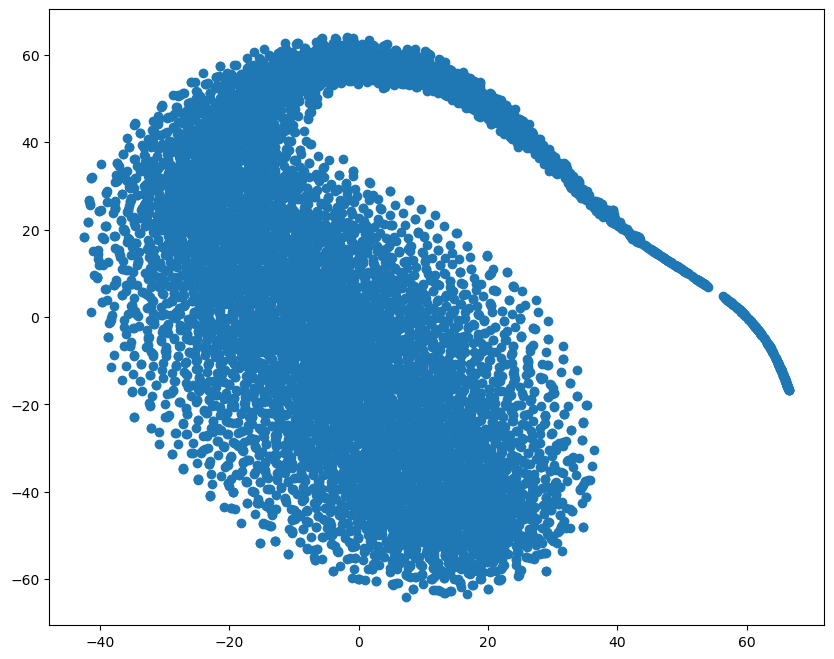

In [26]:
X = model.wv[model.wv.index_to_key]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) 

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

# for i, (x, y) in enumerate(X_tsne):
#     word = model.wv.index_to_key[i]
#     plt.annotate(word, (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)
    
plt.show()

#### FastText

In [27]:
# Creating the FastText model
model2 = FastText(words, window=5, min_count=1, workers=4)

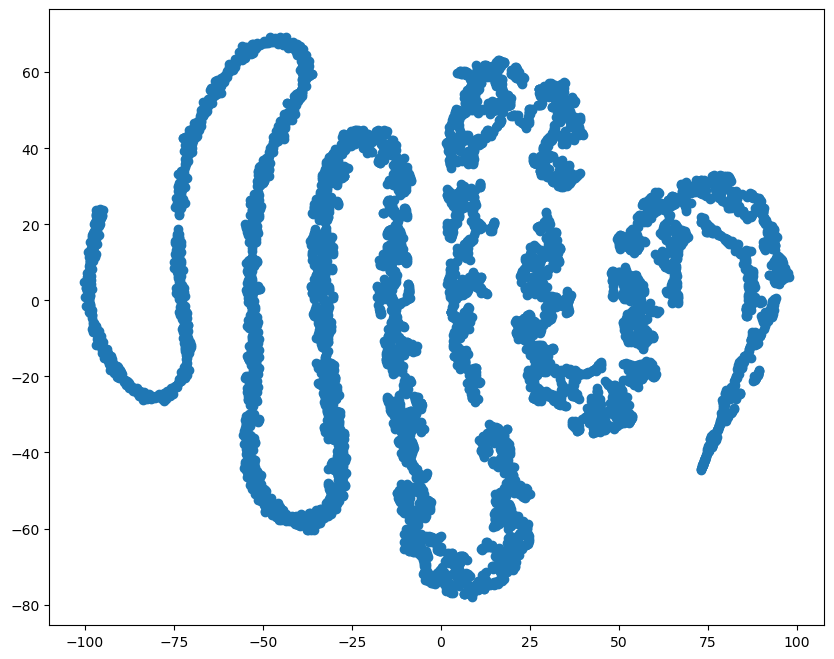

In [28]:
X = model2.wv[model2.wv.index_to_key]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) 

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

# for i, (x, y) in enumerate(X_tsne):
#     word = model2.wv.index_to_key[i]
#     plt.annotate(word, (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

plt.show()

#### Simplified

In [29]:
file_path2 = 'voynich_full_simplified.txt'
simplified_words = load_data_words(file_path2)

In [30]:
model3 = FastText(simplified_words, vector_size = 100, window=5, min_count=1, workers=4)

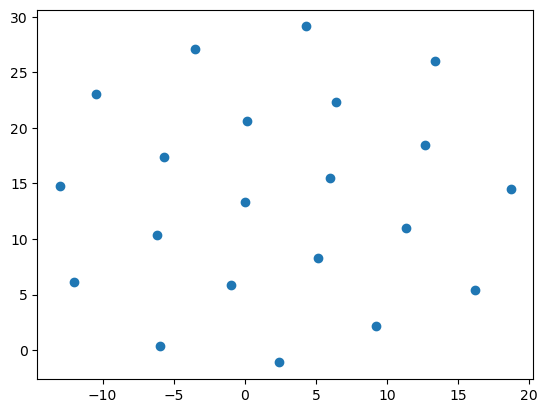

In [31]:
# Load data using the previously defined load_data function
X = model3.wv[model3.wv.index_to_key]

# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, perplexity = 20)
X_tsne = tsne.fit_transform(X[:1000,:])  # Only using the first 1000 vectors for visualization

# Plot t-SNE visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

## Takahashi Translation

In [32]:
takahashi.head()

line folio section quire  \
0  [fachys, ykal, ar, ataiin, shol, shory, cth, r...   f1r       T     A   
1  [fachys, ykal, ar, ataiin, shol, shory, cthory...   f1r       T     A   
2  [fya, ys, ykal, ar, ytaiin, shol, shory, k, re...   f1r       T     A   
3  [fachys, ykal, ar, ataiin, shol, shory, cth, r...   f1r       T     A   
4  [fya, ys, ykal, ar, ytaiin, shol, shory, r, s,...   f1r       T     A   

  panel language hand misc d.hand placement line_number transcriber  \
0     A        A    1  NaN      1        P1           1           H   
1     A        A    1  NaN      1        P1           1           C   
2     A        A    1  NaN      1        P1           1           F   
3     A        A    1  NaN      1        P1           1           N   
4     A        A    1  NaN      1        P1           1           U   

                                        complex.line  par_init  par_fin  \
0  fachys.ykal.ar.ataiin.shol.shory.cth!res.y.kor...       0.0     27.0   
1  fachys.ykal.ar.ataiin.shol.shory.cthorys.y.kor...       NaN      NaN   
2  fya!ys.ykal.ar.ytaiin.shol.shory.*k*!res.y!kor...       NaN      NaN   
3  fachys.ykal.ar.ataiin.shol.shory.cth!res.y,kor...       NaN      NaN   
4  fya!ys.ykal.ar.ytaiin.shol.shory.***!r*s.y.kor...       NaN      NaN   

                                       combined_line  
0  fachys ykal ar ataiin shol shory cth res y kor...  
1  fachys ykal ar ataiin shol shory cthorys y kor...  
2  fya ys ykal ar ytaiin shol shory  k  res y kor...  
3  fachys ykal ar ataiin shol shory cth res y kor...  
4  fya ys ykal ar ytaiin shol shory     r s y kor...

<Axes: xlabel='line_number', ylabel='Count'>

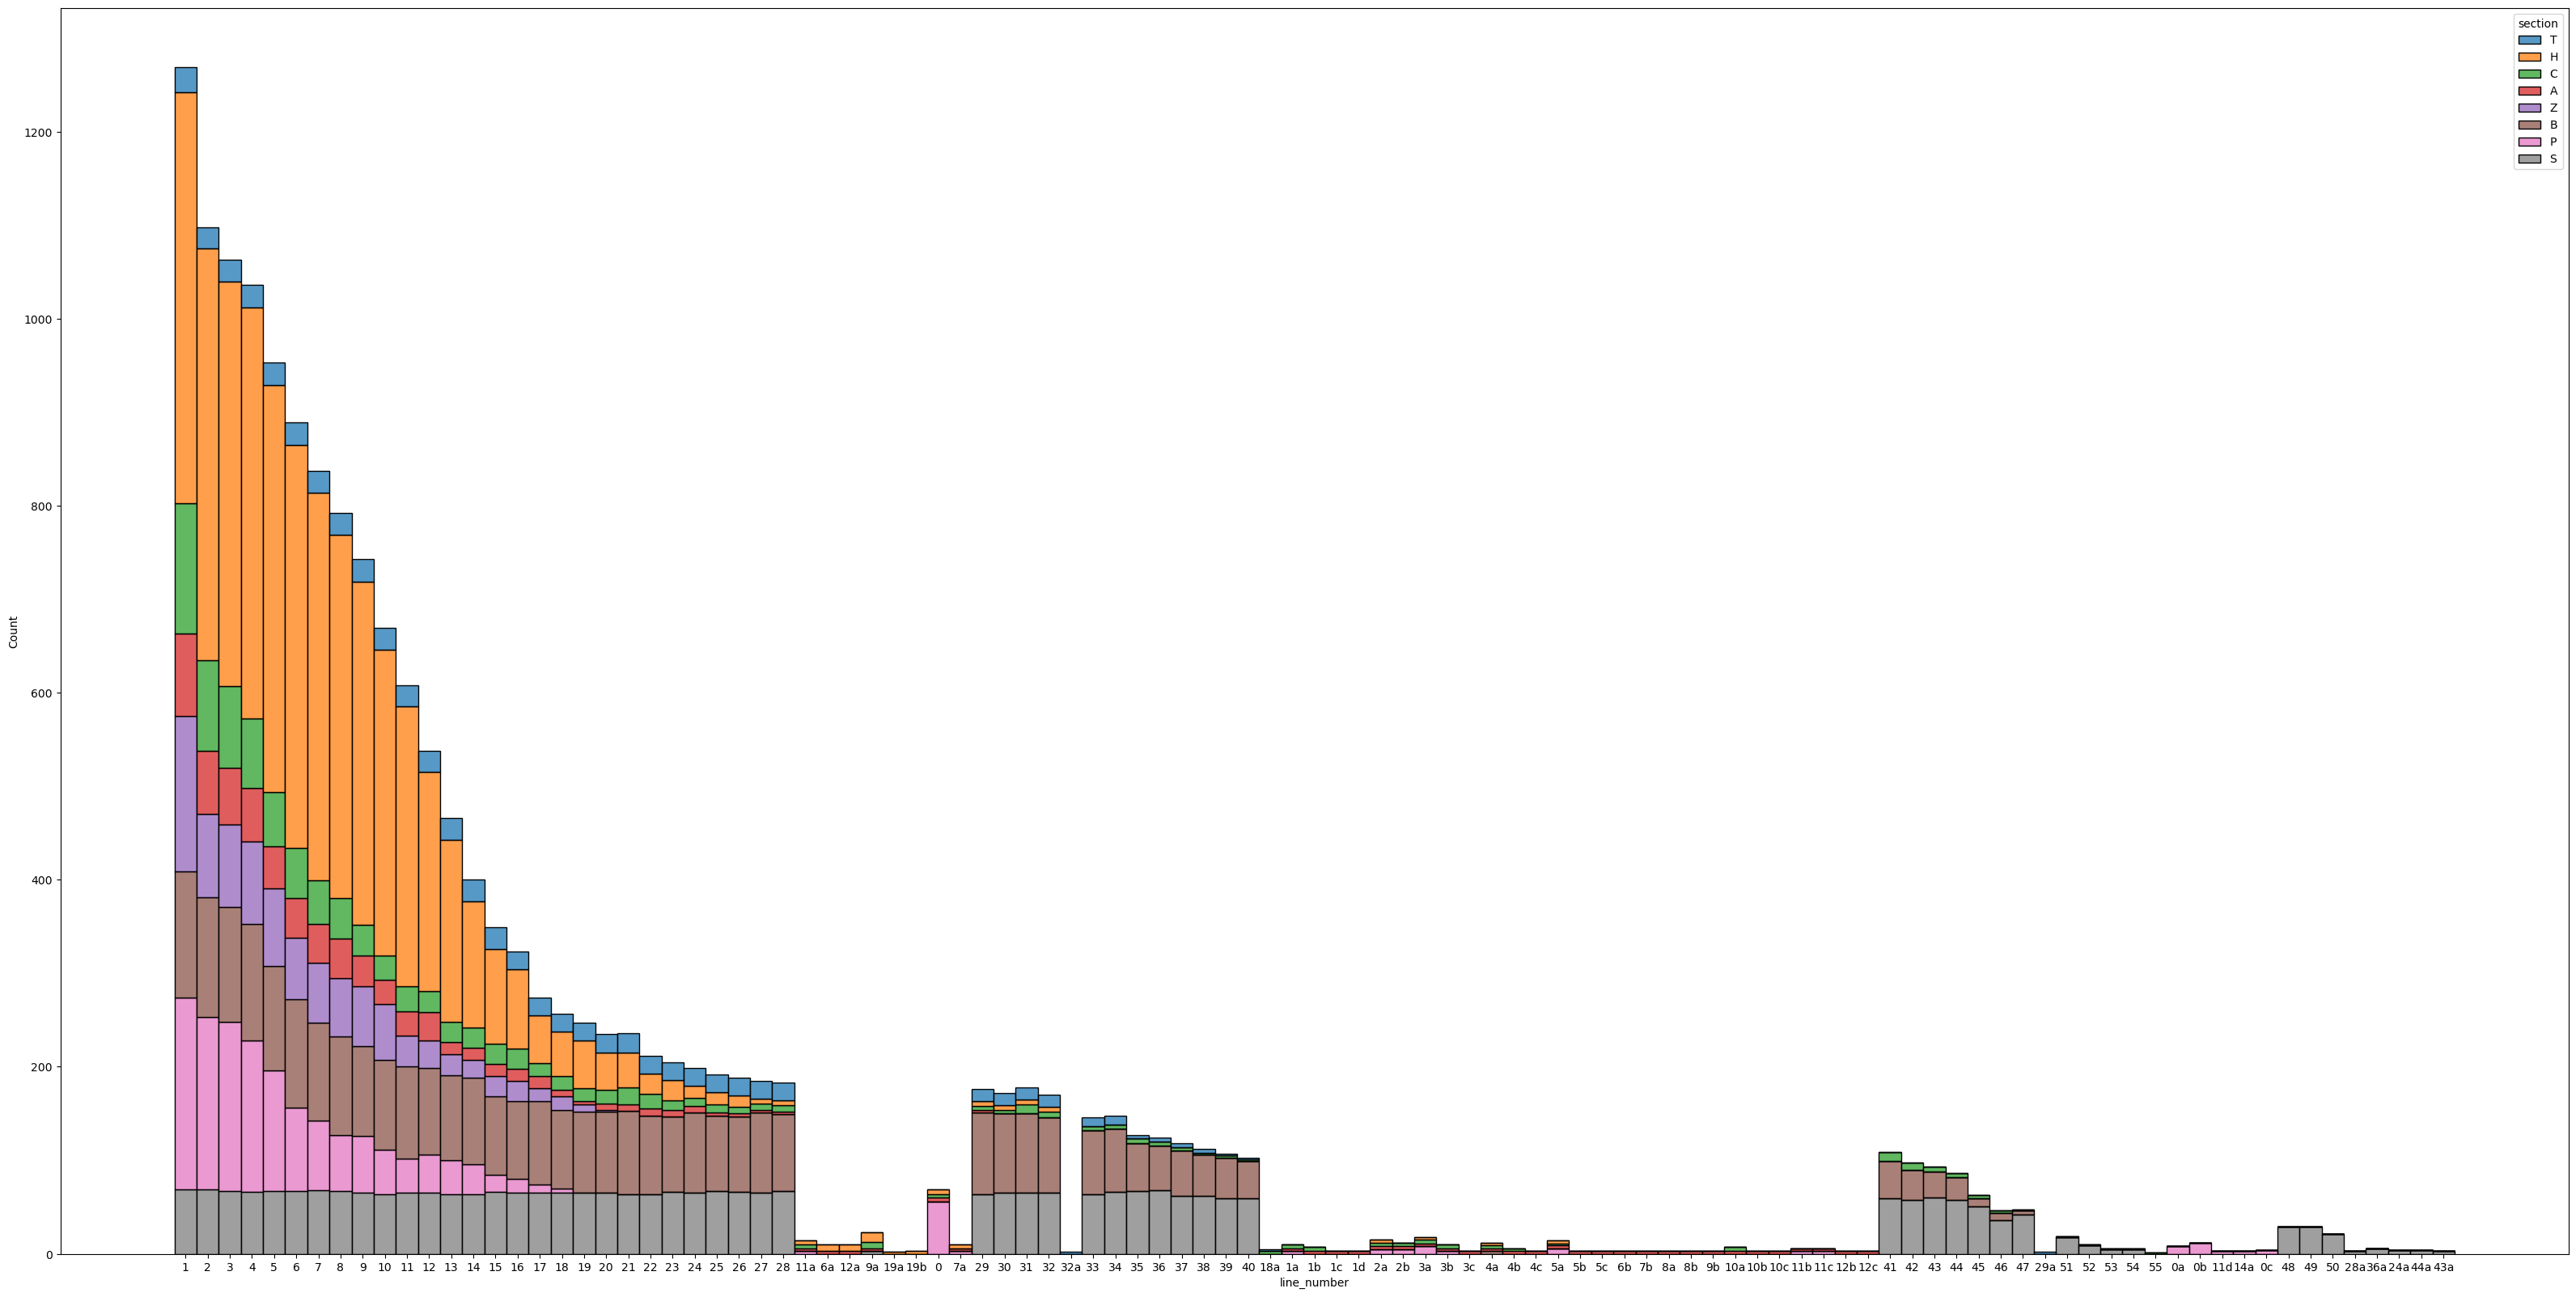

In [33]:
plt.figure(figsize = (40, 20))
sns.histplot(takahashi, x = 'line_number', 
            hue = 'section', 
            multiple = 'stack',)

Text(0.5, 1.0, 'Frequency of Section Types')

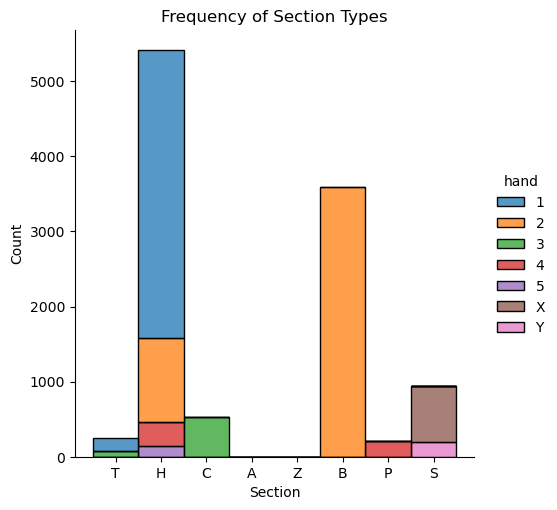

In [34]:
sns.displot(takahashi, x = 'section', 
            hue = 'hand', 
            multiple = 'stack')
plt.xlabel('Section')
plt.title('Frequency of Section Types')

#### Topic Modeling using Takahashi Translation

In [35]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [36]:
def set_up_lda_param(df):
    dictionary = corpora.Dictionary(df['line'])
    corpus = [dictionary.doc2bow(doc) for doc in df['line']]
    return dictionary, corpus

In [37]:
dictionary, corpus = set_up_lda_param(takahashi)
lda = LdaModel(corpus, num_topics=5, id2word = dictionary)

In [38]:
print(lda.print_topics(num_topics=5, num_words=3))
pyLDAvis.gensim.prepare(lda, corpus = corpus, dictionary = dictionary)

[(0, '0.048*"daiin" + 0.035*"aiin" + 0.027*"oteey"'), (1, '0.048*"n" + 0.030*"ol" + 0.027*"qol"'), (2, '0.111*"n" + 0.020*"qokai" + 0.020*"qokar"'), (3, '0.037*"chedy" + 0.035*"al" + 0.030*"qokeedy"'), (4, '0.033*"ar" + 0.029*"n" + 0.022*"chey"')]


/Users/milliehuang/miniconda3/envs/goodreads/lib/python3.12/site-packages/dateutil/tz/tz.py:37: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  EPOCH = datetime.datetime.utcfromtimestamp(0)
/Users/milliehuang/miniconda3/envs/goodreads/lib/python3.12/site-packages/dateutil/tz/tz.py:37: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  EPOCH = datetime.datetime.utcfromtimestamp(0)
/Users/milliehuang/miniconda3/envs/goodreads/lib/python3.12/site-packages/dateutil/tz/tz.py:37: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.217933 -0.074472       1        1  25.880566
0     -0.188985 -0.139601       2        1  22.341715
2     -0.018214  0.150633       3        1  18.095310
1     -0.041391  0.129827       4        1  17.781681
4      0.030657 -0.066387       5        1  15.900728, topic_info=         Term         Freq        Total Category  logprob  loglift
127         n  4502.000000  4502.000000  Default  30.0000  30.0000
48      oteey   805.000000   805.000000  Default  29.0000  29.0000
1381      qol   639.000000   639.000000  Default  28.0000  28.0000
1772  qokeedy  1134.000000  1134.000000  Default  27.0000  27.0000
304        al  1417.000000  1417.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
304        al   160.664611  1417.747422   Topic5  -4.8818  -0.3387
52     okaiin   152.275778  1184.102754   Topic5  -4.9354  -0.2122
9           y   143.462729  1074.791075   Topic5  -4.9951  -0.1750
47     otaiin   137.943037   949.480922   Topic5  -5.0343  -0.0903
122      chol   124.102093  1043.507380   Topic5  -5.1400  -0.2904

[352 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
468       3  0.997035      ai
2384      1  0.106118     aii
2384      2  0.011791     aii
2384      3  0.047164     aii
2384      5  0.837154     aii
...     ...       ...     ...
85        4  0.979746   yshey
15        1  0.159623  ytaiin
15        2  0.821762  ytaiin
15        3  0.017736  ytaiin
1425      2  0.996181    ytar

[613 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2, 5])

#### Word2Vec

In [39]:
# Creating the Word2Vec model
model4 = Word2Vec(takahashi['line'], window=5, min_count=1, workers=4)

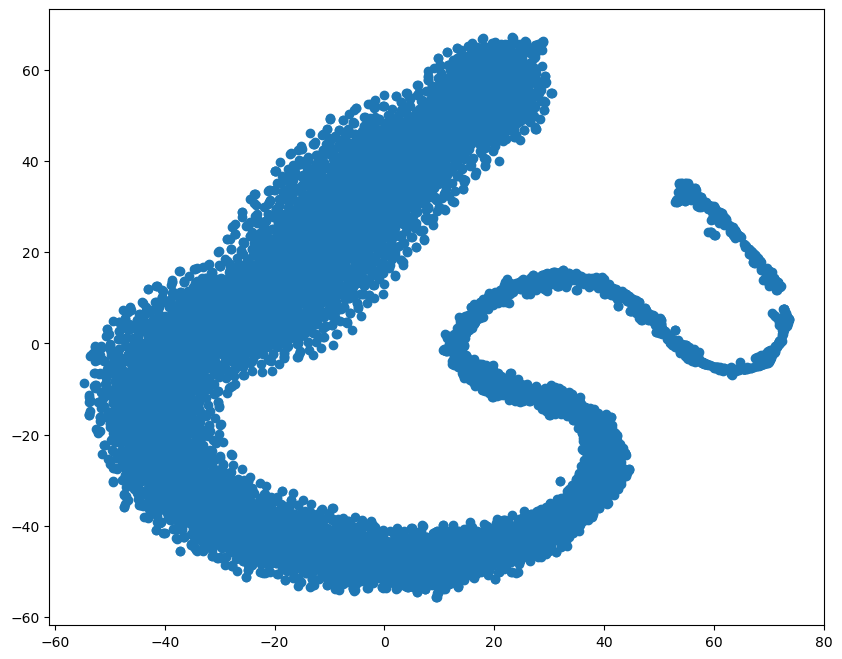

In [40]:
X = model4.wv[model4.wv.index_to_key]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) 

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

plt.show()

In [41]:
tsne_df = pd.DataFrame(X_tsne, columns=['x', 'y'])

In [42]:
unique_words = pd.DataFrame({'word': list(set(
    [word for sublist in takahashi['line'] for word in sublist]))})

def most_common(word, col = 'section'):
    word_counts = Counter([takahashi.loc[i, col] for i, sublist in enumerate(takahashi['line']) if word in sublist])
    if word_counts:
        return max(word_counts, key=word_counts.get)
    else:
        return None

unique_words['section'] = unique_words['word'].apply(most_common)

In [43]:
unique_words['hand'] = unique_words['word'].apply(lambda x: most_common(x, 'hand')).fillna(0)
unique_words['language'] = unique_words['word'].apply(lambda x: most_common(x, 'language')).fillna('')

In [44]:
unique_words.head()

word section hand language
0     otaky       H    2        B
1  lsheedai       S    0        B
2     rteol       S    0        B
3      kaly       H    2        B
4    oltshs       B    2        B

In [45]:
tsne_df['word'] = [model4.wv.index_to_key[i] for i in range(len(X))]
tsne_df = pd.merge(tsne_df, unique_words, on = 'word', how = 'inner')
tsne_df.head()

x          y   word section hand language
0  54.867775  35.060150  daiin       H    1        A
1  53.382305  33.265682      n       S    2        B
2  55.045353  32.716820     ol       B    2        B
3  53.355087  31.039820  chedy       B    2        B
4  56.090099  34.103233   aiin       S    0        B

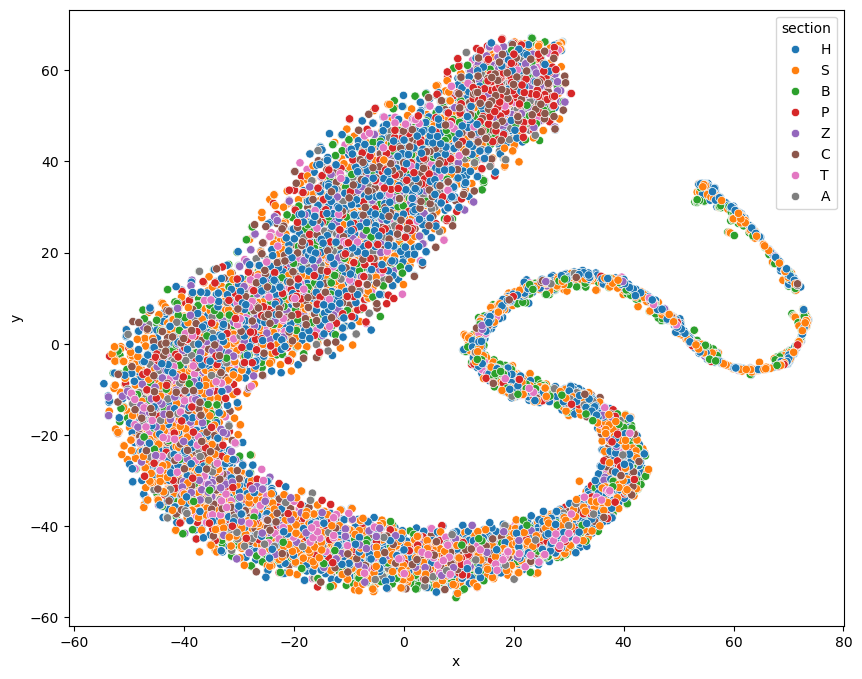

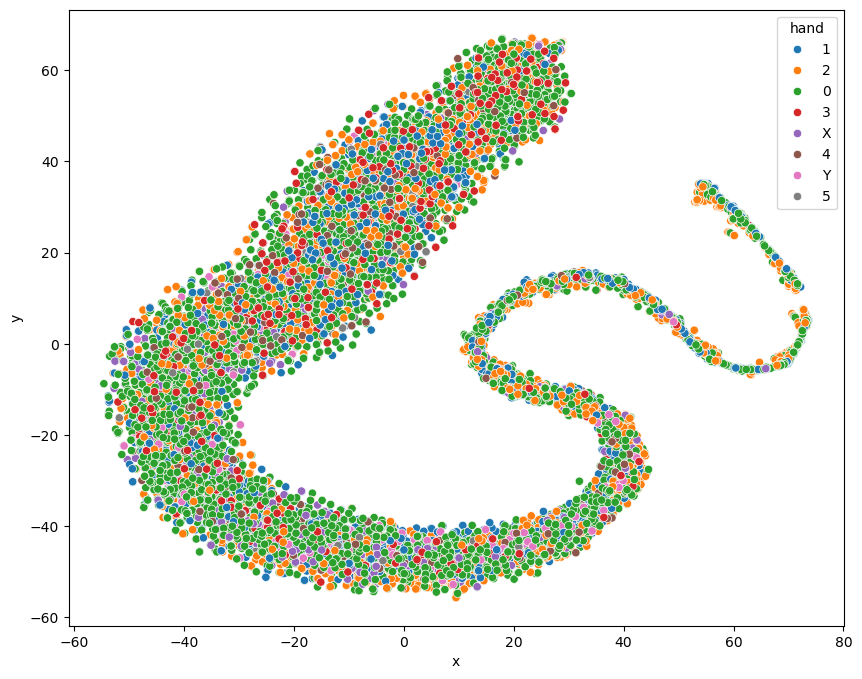

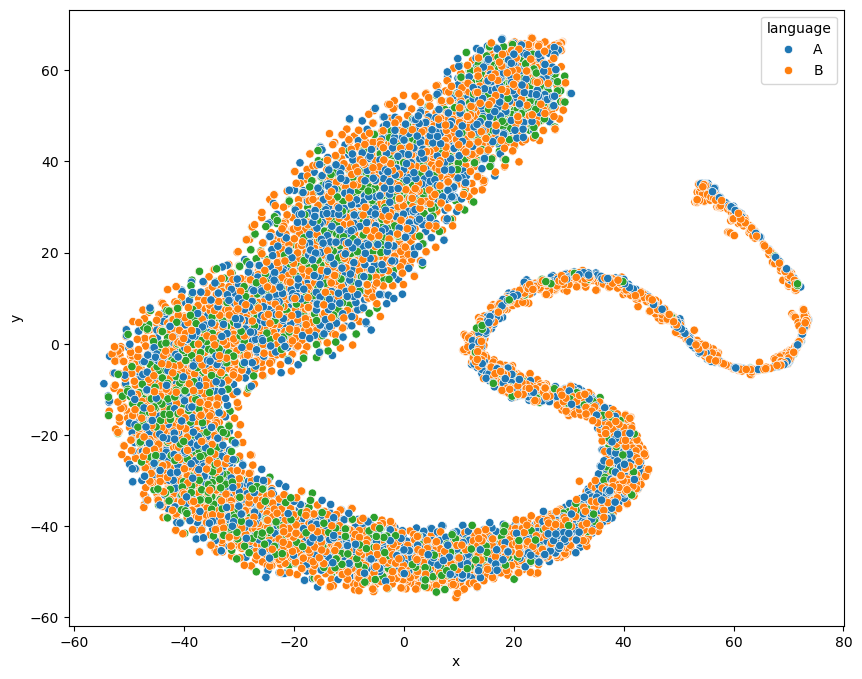

In [46]:
# Colored by section
plt.figure(figsize=(10, 8))
sns.scatterplot(data = tsne_df, x = 'x', y = 'y', hue = 'section')
plt.show()

# Colored by hand
plt.figure(figsize=(10, 8))
sns.scatterplot(data = tsne_df, x = 'x', y = 'y', hue = 'hand')
plt.show()

# Colored by language
plt.figure(figsize=(10, 8))
sns.scatterplot(data = tsne_df, x = 'x', y = 'y', hue = 'language')
plt.show()

#### FastText 

In [47]:
# Creating the FastText model
model5 = FastText(takahashi['line'], window=5, min_count=1, workers=4)

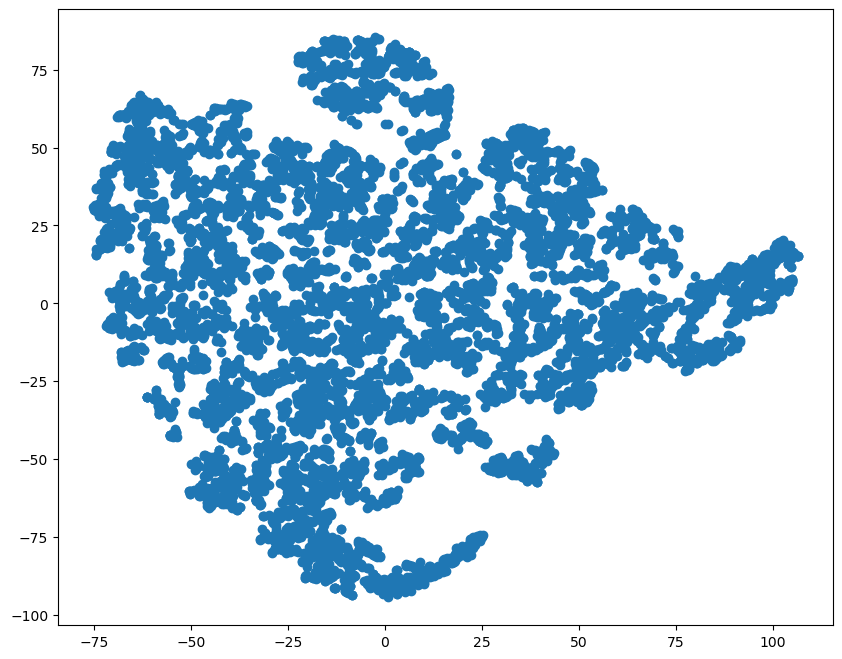

In [48]:
X = model5.wv[model5.wv.index_to_key]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) 

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])

plt.show()

In [49]:
len(X_tsne[:, 0])

9863

In [50]:
tsne_df2 = pd.DataFrame(X_tsne, columns=['x', 'y'])
tsne_df2['word'] = [model5.wv.index_to_key[i] for i in range(len(X))]
tsne_df2 = pd.merge(tsne_df2, unique_words, on = 'word', how = 'inner')
tsne_df2.head()

x          y   word section hand language
0  -36.865948  63.073082  daiin       H    1        A
1   32.379929  30.180315      n       S    2        B
2   18.258417  47.956169     ol       B    2        B
3  102.016396  19.670675  chedy       B    2        B
4  -35.627945  63.443676   aiin       S    0        B

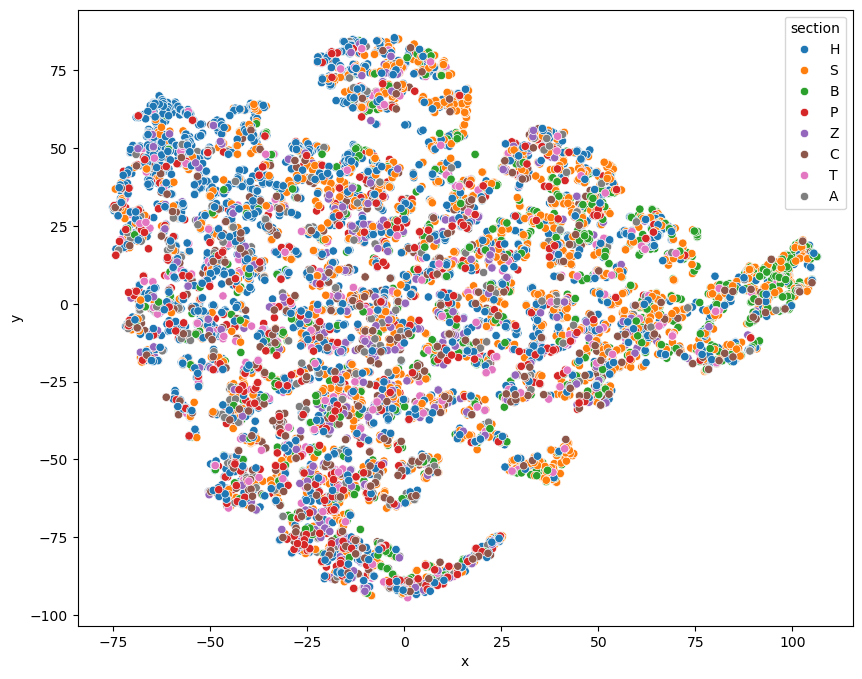

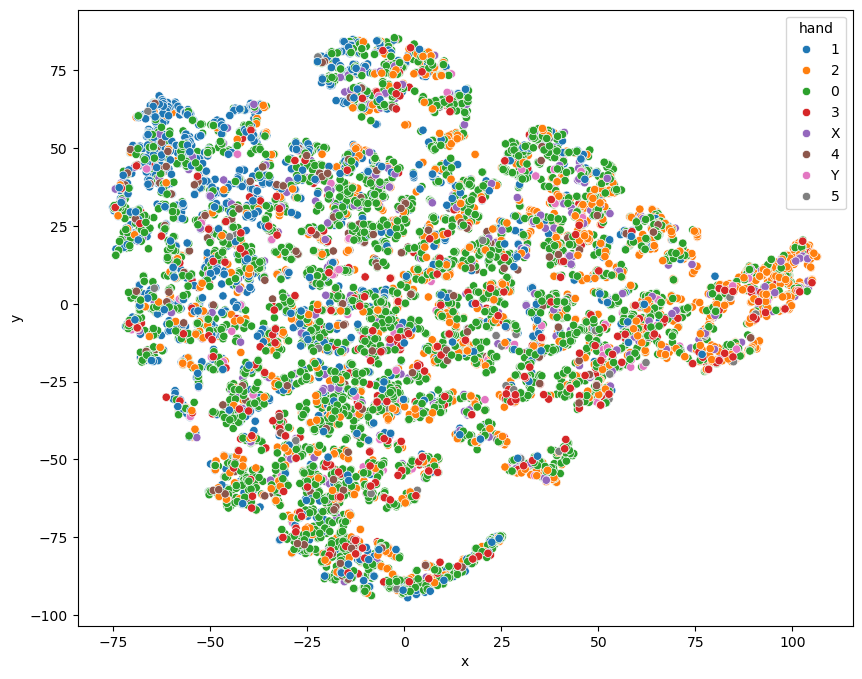

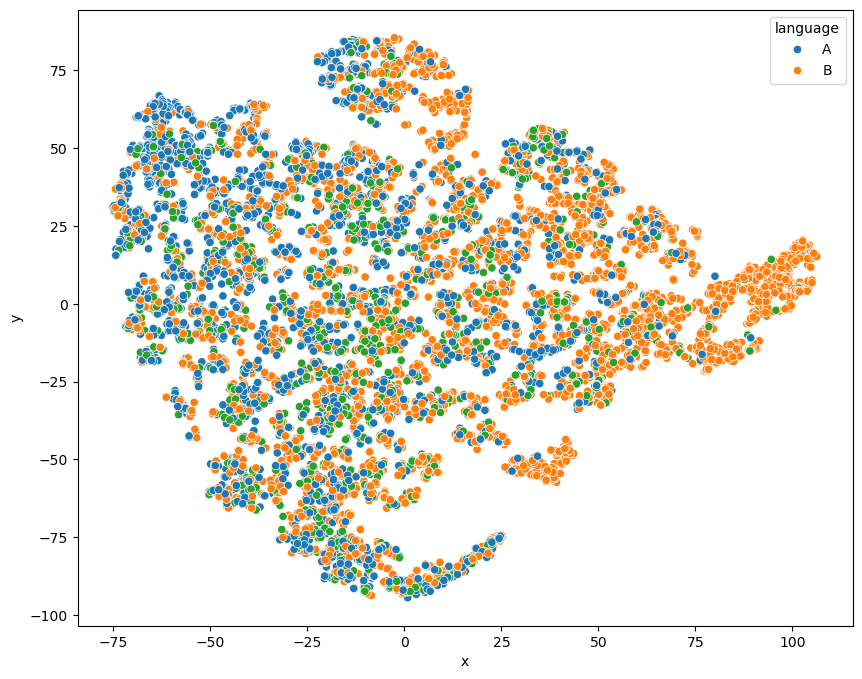

In [51]:
# Colored by section
plt.figure(figsize=(10, 8))
sns.scatterplot(data = tsne_df2, x = 'x', y = 'y', hue = 'section')
plt.show()

# Colored by hand
plt.figure(figsize=(10, 8))
sns.scatterplot(data = tsne_df2, x = 'x', y = 'y', hue = 'hand')
plt.show()

# Colored by language
plt.figure(figsize=(10, 8))
sns.scatterplot(data = tsne_df2, x = 'x', y = 'y', hue = 'language')
plt.show()

#### Testing UMAP (using FastText)

In [52]:
import umap.umap_ as umap
X_umap = umap.UMAP().fit_transform(X)

/Users/milliehuang/.local/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [53]:
umap_df = pd.DataFrame(X_umap, columns=['x', 'y'])
umap_df['word'] = [model5.wv.index_to_key[i] for i in range(len(X))]
umap_df = pd.merge(umap_df, unique_words, on = 'word', how = 'inner')
umap_df.head()

x          y   word section hand language
0 -5.259576  -1.591537  daiin       H    1        A
1 -2.625731   3.594062      n       S    2        B
2 -3.240520  -0.527110     ol       B    2        B
3 -2.140195  11.998991  chedy       B    2        B
4 -5.321840  -1.390670   aiin       S    0        B

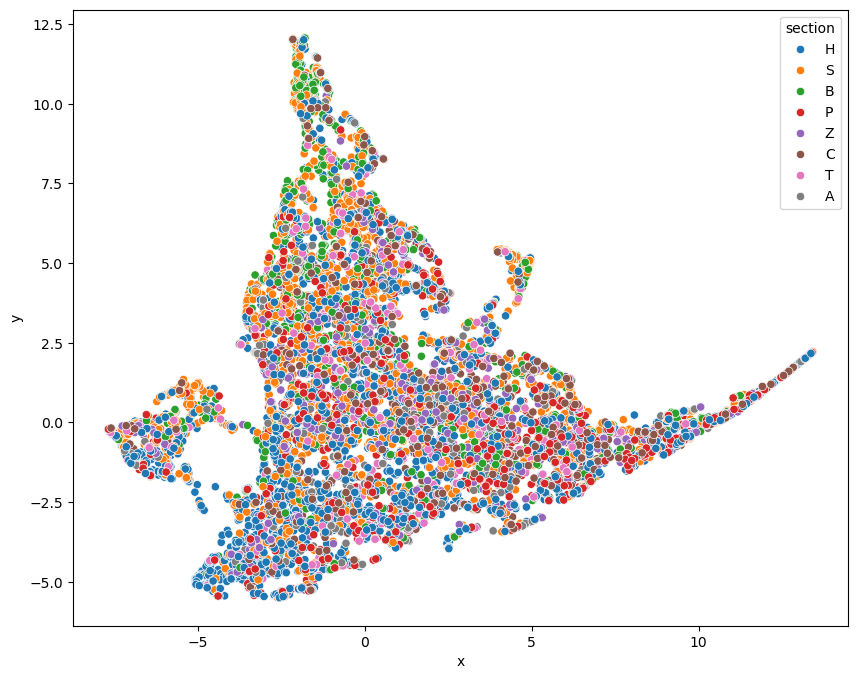

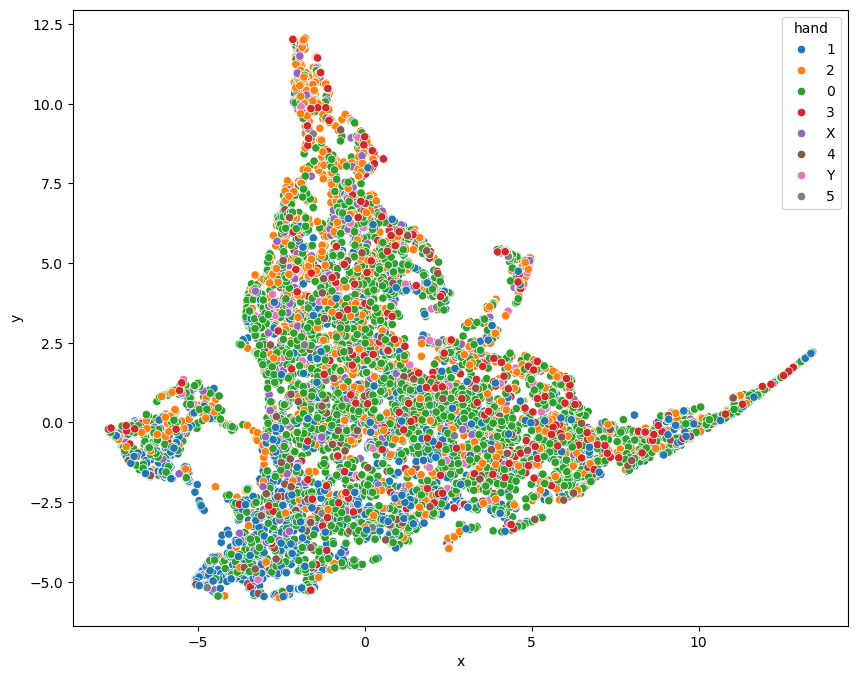

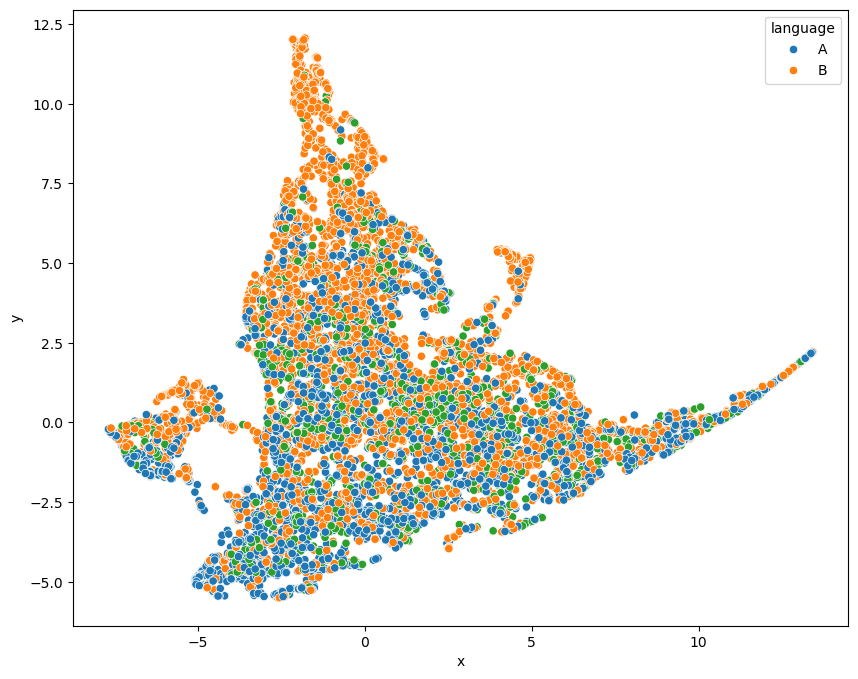

In [54]:
# Colored by section
plt.figure(figsize=(10, 8))
sns.scatterplot(data = umap_df, x = 'x', y = 'y', hue = 'section')
plt.show()

# Colored by hand
plt.figure(figsize=(10, 8))
sns.scatterplot(data = umap_df, x = 'x', y = 'y', hue = 'hand')
plt.show()

# Colored by language
plt.figure(figsize=(10, 8))
sns.scatterplot(data = umap_df, x = 'x', y = 'y', hue = 'language')
plt.show()

architecture transformers
- huggingface
- elmo
- seq2seq
- BERT (transformer)

### Transformers

#### BERT???

In [ ]:
import torch 
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [ ]:
takahashi['line'][1]

In [ ]:
# Tokenize and encode text using batch_encode_plus
# The function returns a dictionary containing the token IDs and attention masks
encoding = tokenizer.batch_encode_plus(
    takahashi['combined_line'],                    # List of input texts
    padding=True,              # Pad to the maximum sequence length
    truncation=True,           # Truncate to the maximum sequence length if necessary
    return_tensors='pt',      # Return PyTorch tensors
    add_special_tokens=True    # Add special tokens CLS and SEP
)
 
input_ids = encoding['input_ids']  # Token IDs
print(input_ids.shape)
attention_mask = encoding['attention_mask']  # Attention mask
print(attention_mask.shape)

In [ ]:
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    word_embeddings = outputs.last_hidden_state  # This contains the embeddings
    
print(word_embeddings.shape)

In [ ]:
decoded_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
#print decoded text
print(f"Decoded Text: {decoded_text}")
# Tokenize the text again for reference
tokenized_text = tokenizer.tokenize(decoded_text)
#print tokenized text
print(f"tokenized Text: {tokenized_text}")
# Encode the text
encoded_text = tokenizer.encode(text, return_tensors='pt')  # Returns a tensor
# Print encoded text
print(f"Encoded Text: {encoded_text}")

#### SentenceTransformers

In [55]:
words_inorder = []

for line in takahashi['line']:
    for word in line:
        words_inorder.append(word)

In [56]:
from sentence_transformers import SentenceTransformer
st = SentenceTransformer("all-MiniLM-L6-v2")

In [57]:
voynich_emb = st.encode(takahashi['combined_line'])

In [ ]:
voynich_emb

In [58]:
emb_umap = umap.UMAP().fit_transform(voynich_emb)
emb_umap.shape

(17357, 2)

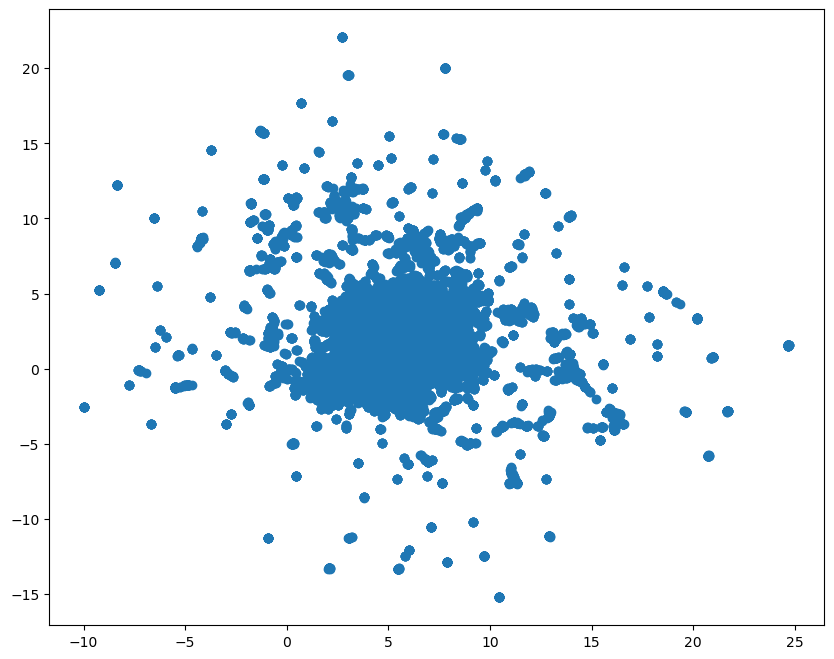

In [59]:
plt.figure(figsize=(10, 8))
plt.scatter(emb_umap[:, 0], emb_umap[:, 1])

plt.show()

In [117]:
umap_df2 = pd.DataFrame(emb_umap, columns=['x', 'y'])
umap_df2['word'] = [] ### include associated words
umap_df2 = pd.merge(umap_df2, unique_words, on = 'word', how = 'inner')
umap_df2.shape

ValueError: Length of values (1) does not match length of index (17357)